In [33]:
import pandas as pd
import numpy as np

results_circles = pd.read_csv("results_circles.csv").iloc[:, 1:11]
results_circles['Type'] = 'Circles'
results_segments = pd.read_csv("results_segments.csv").iloc[:, 1:11]
results_segments['Type'] = 'Segments'

results = pd.concat([results_circles, results_segments])

In [37]:
tabla_comparadora = results.groupby(['Type', 'n_N', 'A4', 'Strength']).describe()[['n_B', 'Gap', 'Runtime', 'Time_Prepro']].round(2).reset_index()

print(tabla_comparadora)

        Type  n_N     A4 Strength   n_B                                    \
                                  count   mean   std    min    25%    50%   
0    Circles    5  False    False   5.0    4.8  0.45    4.0    5.0    5.0   
1    Circles    5  False     True   5.0    4.8  0.45    4.0    5.0    5.0   
2    Circles    5   True    False   5.0   10.4  0.89    9.0   10.0   11.0   
3    Circles    5   True     True   5.0   10.4  0.89    9.0   10.0   11.0   
4    Circles   10  False    False   5.0    9.2  1.30    7.0    9.0   10.0   
5    Circles   10  False     True   5.0    9.2  1.30    7.0    9.0   10.0   
6    Circles   10   True    False   5.0   19.2  2.49   15.0   19.0   20.0   
7    Circles   10   True     True   5.0   19.2  2.49   15.0   19.0   20.0   
8    Circles   20  False    False   5.0   17.6  1.52   16.0   17.0   17.0   
9    Circles   20  False     True   5.0   17.6  1.52   16.0   17.0   17.0   
10   Circles   20   True    False   5.0   35.8  2.77   33.0   34.0   35.0   

In [49]:
resultados = pd.DataFrame()
resultados['Type'] = tabla_comparadora['Type']
resultados['n_N'] = tabla_comparadora['n_N']
resultados['n_B'] = tabla_comparadora['n_B']['mean']
resultados['A4'] = tabla_comparadora['A4']
resultados['Strength'] = tabla_comparadora['Strength']
resultados['#Found'] = tabla_comparadora['Runtime']['count']
resultados['Gap'] = tabla_comparadora['Gap']['mean']
resultados['Runtime'] = tabla_comparadora['Runtime']['mean']
resultados['Time_Prepro'] = tabla_comparadora['Time_Prepro']['mean']

resultados.to_excel('summary_results.xlsx')

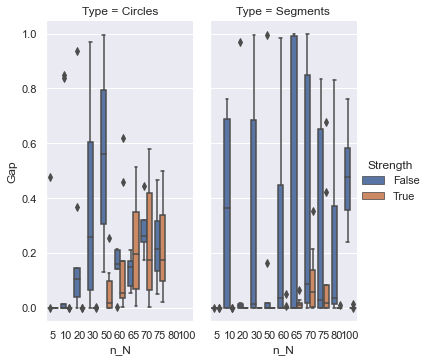

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tikzplotlib
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

results_circles = pd.read_csv("results_circles.csv").iloc[:, 1:11]
results_circles['Type'] = 'Circles'
results_segments = pd.read_csv("results_segments.csv").iloc[:, 1:11]
results_segments['Type'] = 'Segments'

results = pd.concat([results_circles, results_segments])

g = sns.catplot(x='n_N', y='Gap', hue='Strength', col='Type', kind='box', data=results, aspect=0.5, sharey=True)

sns.set(style="darkgrid")

# g.set(yscale='log')

tikzplotlib.save('gap_boxplot_first_experiment.tex', encoding='utf-8')

plt.savefig('gap_boxplot_first_experiment.png')


In [3]:
import pandas as pd
import numpy as np

results_marginal = pd.read_csv("results_smith_marginal.csv").iloc[:, 1:16]

tabla_comparadora = results_marginal.groupby(['n_N', 'edge_removing', 'variable_fixing', 'bigM_estimation']).describe()[['n_B', 'Gap', 'Runtime', 'Time_Prepro']].round(2).reset_index()

print(tabla_comparadora)
resultados = pd.DataFrame()
resultados['n_N'] = tabla_comparadora['n_N']
resultados['n_B'] = tabla_comparadora['n_B']['mean']
resultados['edge_removing'] = tabla_comparadora['edge_removing']
resultados['variable_fixing'] = tabla_comparadora['variable_fixing']
resultados['bigM_estimation'] = tabla_comparadora['bigM_estimation']
resultados['#Found'] = tabla_comparadora['Runtime']['count']
resultados['Gap'] = tabla_comparadora['Gap']['mean']
resultados['Runtime'] = tabla_comparadora['Runtime']['mean']
resultados['Time_Prepro'] = tabla_comparadora['Time_Prepro']['mean']

tabla_comparadora.to_excel('summary_marginal.xlsx')


  n_N edge_removing variable_fixing bigM_estimation   n_B                    \
                                                    count  mean   std   min   
0  10         False           False           False  10.0  18.0  3.59  13.0   
1  10         False           False            True  10.0  18.0  3.59  13.0   
2  10         False            True           False  10.0  18.0  3.59  13.0   
3  10          True           False           False  10.0  18.0  3.59  13.0   

               ...  Runtime          Time_Prepro                           \
    25%   50%  ...      75%      max       count   mean   std   min   25%   
0  14.5  18.5  ...  3600.21  3607.01         9.0  11.05  4.51  5.52  6.61   
1  14.5  18.5  ...  3600.16  3600.23         9.0  12.22  4.94  6.33  7.46   
2  14.5  18.5  ...  3600.71  3602.40        10.0  11.72  5.07  5.41  7.00   
3  14.5  18.5  ...  3600.06  3600.09         9.0   7.35  2.68  3.98  4.87   

                        
     50%    75%    max  
0  11.11  14